In [60]:
import seaborn as sns
sns.set_style("whitegrid")

### Model

- $P_1/P_2 \approx \text{constant}$
- When the ratio goes above the constant, it tends to come down.
- When the ratio goes below the constant, it tends to come up.
$$ \Delta \text{ratio} = \begin{cases} + & \text{when ratio $<0$}\\
0 & \text{when ratio $>0$}
\end{cases}
$$
-Assume the change is larger when the ratio is further from the constant as
$$\Delta \text{ratio} = - k(\text{ lagged ratio} - \text{constant})$$
for a constant $k>0$.

- The model is equivalent to 
$$$$\Delta \text{ratio} = a + b\text{lagged ratio}$$
where $a=k \times \text{constant}$, $b=-k$.
- Estimate $a$ and $b$ by linear regression.
- Should get $a>0$, $b<0$.
- If so, $\text{constant} = $-a/b$.
- Hold asset 1 when ratio < $-a/b$.
- Hold asset 2 when ratio > $-a/b$.

In [61]:
import yfinance as yf
import pandas as pd
data = yf.download(["CVX", "COP"], start="2000-01-01")["Adj Close"]
data.index = pd.to_datetime(data.index.strftime("%Y-%m-%d"))
data["ratio"] = data.CVX / data.COP
data["lagged_ratio"] = data.ratio.shift()
data["delta_ratio"] = data.ratio.diff()
data.head()

[*********************100%***********************]  2 of 2 completed


,COP,CVX,ratio,lagged_ratio,delta_ratio
Date,,,,,
2000-01-03,8.086300,17.508471,2.165202,NaN,NaN
2000-01-04,7.930150,17.508471,2.207836,2.165202,0.042634
2000-01-05,7.785154,17.822508,2.289294,2.207836,0.081458
2000-01-06,8.052837,18.581480,2.307445,2.289294,0.018151
2000-01-07,8.052837,18.908613,2.348068,2.307445,0.040623


In [62]:
import statsmodels.formula.api as smf
regression = smf.ols(
    "delta_ratio ~ lagged_ratio", data
)
a, b = regression.fit().params
print(
    f"a = {a:.3f}, b = {b:.3f}, constant = {-a/b:.3f}"
)

a = 0.005, b = -0.003, constant = 1.659


In [63]:
data["long_cvx"] = data.lagged_ratio < -a/b 
data["long_cop"] = data.lagged_ratio > -a/b 
data["ret_cvx"] = data.CVX.pct_change()
data["ret_cop"] = data.COP.pct_change()
data["ret"] = data.long_cvx*data.ret_cvx + data.long_cop*data.ret_cop

print(f"mean return of pairs strategy = {252*data.ret.mean():.2%} annualized")
print(f"mean return of CVX = {252*data.ret_cvx.mean():.2%} annualized")
print(f"mean return of COP = {252*data.ret_cop.mean():.2%} annualized")

mean return of pairs strategy = 19.02% annualized
mean return of CVX = 13.43% annualized
mean return of COP = 17.25% annualized


<AxesSubplot: xlabel='Date'>

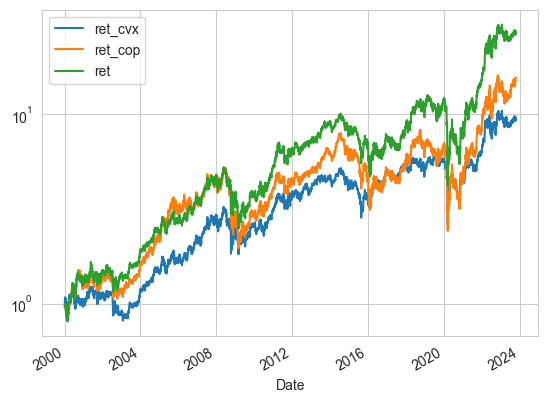

In [64]:
(1+data[["ret_cvx", "ret_cop", "ret"]]).cumprod().plot(logy=True)

In [67]:
past = data.loc[:"2015-01-01"].copy()
future = data.loc["2015-01-01":].copy()
regression = smf.ols(
    "delta_ratio ~ lagged_ratio", past
)
a, b = regression.fit().params
print(
    f"a = {a:.3f}, b = {b:.3f}, constant = {-a/b:.3f}"
)

a = 0.005, b = -0.003, constant = 1.562


In [68]:
future["long_cvx"] = future.lagged_ratio < -a/b 
future["long_cop"] = future.lagged_ratio > -a/b 
future["ret_cvx"] = future.CVX.pct_change()
future["ret_cop"] = future.COP.pct_change()
future["ret"] = future.long_cvx*future.ret_cvx + future.long_cop*future.ret_cop

print(f"mean return of pairs strategy = {252*future.ret.mean():.2%} annualized")
print(f"mean return of CVX = {252*future.ret_cvx.mean():.2%} annualized")
print(f"mean return of COP = {252*future.ret_cop.mean():.2%} annualized")

mean return of pairs strategy = 20.44% annualized
mean return of CVX = 13.61% annualized
mean return of COP = 18.24% annualized
